In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import matplotlib.animation as animation
import sys
sys.path.insert(0,'..')
from functions import getRad, lowPass, mean_mask


# lp = '/scratch-shared/janssens/bomex200aswitch/a2'
# lp = '/scratch-shared/janssens/eurec4a_old/eurec4a_mean_ssthet'
lp = '/Users/martinjanssens/Documents/Wageningen/Patterns-in-satellite-images/BOMEXStability/bomex200_e12'
sp = lp+'/figs'

klp = 4
qlc = 1e-7

ds = nc.Dataset(lp+'/cape2d.001.nc')
ds1 = nc.Dataset(lp+'/profiles.001.nc')

time  = np.ma.getdata(ds.variables['time'][:]) / 3600
xf    = np.ma.getdata(ds.variables['xt'][:]) # Cell centres (f in mhh)
xh    = np.ma.getdata(ds.variables['xm'][:]) # Cell edges (h in mhh)
yf    = np.ma.getdata(ds.variables['yt'][:]) # Cell centres (f in mhh)
yh    = np.ma.getdata(ds.variables['ym'][:]) # Cell edges (h in mhh)

extent = np.array([xf.min(), xf.max(), xf.min(), xf.max()])/1000

circ_mask = np.zeros((xf.size,xf.size))
rad = getRad(circ_mask)
circ_mask[rad<=klp] = 1

# Calculate column-averaged density
zf = ds1['zt'][:].data
rhob = ds1['rhobf'][0,:].data
rho0 = np.trapz(rhob,zf)

/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/si

/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


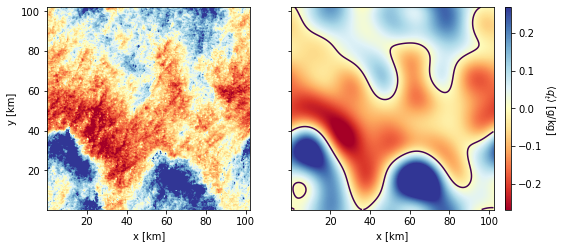

In [4]:
#%% Plot twp, twppf and clouds at a single time step
tPlot = 24
fq=1e3

it = np.argmin(abs(tPlot-time))

# TWP fluctuation
twpp = np.ma.getdata(ds.variables['twp'][it,:,:])
twpp -= np.mean(twpp)

# Low-pass filtered TWP fluctuation
twppf = lowPass(twpp, circ_mask)

fig,axs = plt.subplots(ncols=2,figsize=(8,4),sharey=True)
sc = axs[0].imshow(twpp*fq/rho0,extent=extent,vmin=-2*fq/rho0,vmax=2*fq/rho0,cmap='RdYlBu')
axs[0].set_xlabel('x [km]')
axs[0].set_ylabel('y [km]')

axs[1].imshow(twppf*fq/rho0,extent=extent,vmin=-2*fq/rho0,vmax=2*fq/rho0,cmap='RdYlBu')
axs[1].contour(twppf*fq/rho0,levels=[0],extent=extent,origin='upper')
axs[1].set_xlabel('x [km]')

pos1 = axs[1].get_position()
cbax = fig.add_axes([.92, pos1.ymin, 0.01, pos1.height])
cb = fig.colorbar(sc, cax=cbax)
cb.ax.set_ylabel(r" $\langle q_t'\rangle$ [g/kg]", rotation=270, labelpad=15) #-65
plt.savefig(sp+'/twpfluct.pdf',bbox_inches='tight',dpi=300)

/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


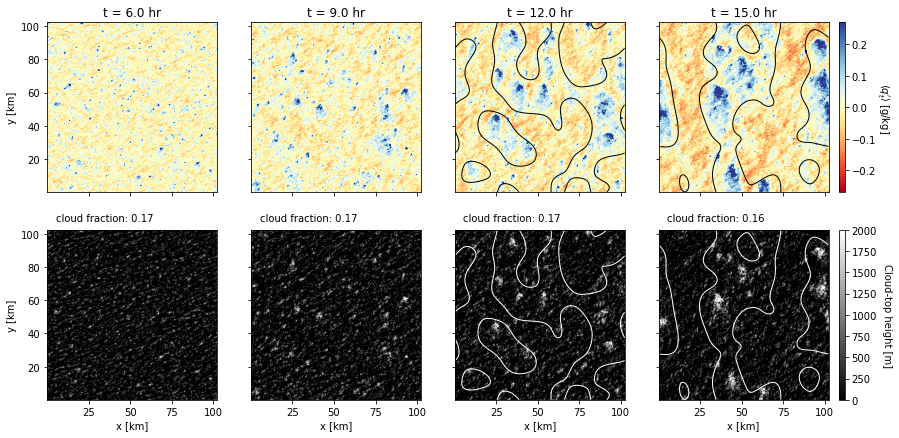

In [5]:
#%% Plot the time evolution of twpp

tPlot = np.arange(6,16,3)

fig,axs = plt.subplots(ncols=len(tPlot),nrows=2,figsize=(3.5*len(tPlot),7),
                       sharex=True,sharey=True,squeeze=False)

for j in range(len(tPlot)):
    it = np.argmin(abs(tPlot[j]-time))
    twpp = np.ma.getdata(ds.variables['twp'][it,:,:])
    twpp -= np.mean(twpp)
    twppf = lowPass(twpp, circ_mask)
    
    cm = np.ma.getdata(ds.variables['cldtop'][it,:,:])
    cf = np.count_nonzero(cm) / cm.size

    sc1 = axs[0,j].imshow(twpp*fq/rho0, extent=extent,vmin=-2*fq/rho0,vmax=2*fq/rho0,cmap='RdYlBu')
    sc2 = axs[1,j].imshow(cm  , extent=extent,vmin=0 ,vmax=2000,cmap='gray')
    
    if j > 1:
        axs[0,j].contour(twppf*fq/rho0,levels=[0],extent=extent,origin='upper',
                         linewidths=1,colors='black')
        axs[1,j].contour(twppf*fq/rho0,levels=[0],extent=extent,origin='upper',
                         linewidths=1,colors='white')
    
    axs[1,j].set_xlabel('x [km]')
    axs[0,j].set_title('t = %.1f hr'%tPlot[j])
    if j == 0:
        axs[0,j].set_ylabel('y [km]')
        axs[1,j].set_ylabel('y [km]')

    if j == len(tPlot)-1:
        pos1 = axs[0,j].get_position()
        cbax1 = fig.add_axes([.91, pos1.ymin, 0.006, pos1.height])
        cb1 = fig.colorbar(sc1, cax=cbax1)
        cb1.ax.set_ylabel(r"$\langle q_t'\rangle$ [g/kg]", rotation=270, labelpad=15)
        
        pos2 = axs[1,j].get_position()
        cbax2 = fig.add_axes([.91, pos2.ymin, 0.006, pos2.height])
        cb2 = fig.colorbar(sc2, cax=cbax2)
        cb2.ax.set_ylabel(r"Cloud-top height [m]", rotation=270, labelpad=15)

    axs[1,j].annotate('cloud fraction: %.2f'%cf, (0.05,1.05),xycoords='axes fraction')
plt.savefig(sp+'/twp_cld_evo.pdf', bbox_inches='tight',dpi=300)